In [1]:
# This cell is to allow automatic notebook generation for docs
# You may want to comment this out if you have paste3 installed
import sys
from pathlib import Path

sys.path.insert(0, str(Path.cwd().parent.parent.parent / "src"))

# Using the PASTE/PASTE2 algorithm through a unifying API

This noteook highlights the creation of slices (the `Slice` class) and datasets (the `AlignmentDataset` class), and the usage of the `pairwise_align` and `center_align` methods of the `AlignmentDataset` class.

**This notebook primarily highlights how you would use the `paste3` package in either the `PASTE` (i.e. full alignment) mode, or the `PASTE2` (i.e. partial alignment) mode.**. This API also closely reflects how our napari plugin works under the hood, so getting familiar with this API will also help you get familiar with the various options available to you in the plugin.

The `paste3.dataset` module provides an easy-to-use API to access input datasets to the `paste3` alignment algorithms.

The `Slice` class is a thin layer on top of an `AnnData` class, and an `AlignmentDataset` class is a collection of `Slice` objects.

In [2]:
from paste3.dataset import AlignmentDataset
from paste3.napari.data.ondemand import get_file

Individual `Slice` objects are created by providing a path to an `.h5ad` file. Each `.h5ad` file is expected to contain an `AnnData` object, and is internally read using a `scanpy.read_h5ad`.

Here we download and cache a few `.h5ad` files locally using a `paste3.napari.data.ondemand.get_file` call. These are the files available as the Sample Data in the `paste3` napari plugin.

In [3]:
slice_files = [Path(f) for f in get_file("paste3_sample_patient_2_")]

A dataset is created using the paths to the individual slices.

In [4]:
dataset = AlignmentDataset(file_paths=slice_files)

Any individual slice can be rendered in a jupyter notebook by simply typing the slice variable name in a cell, which renders the slice using the `scanpy` library. (Note: This is roughly equivalent to doing `scanpy.pl.spatial(<slice>.adata, ..)`)

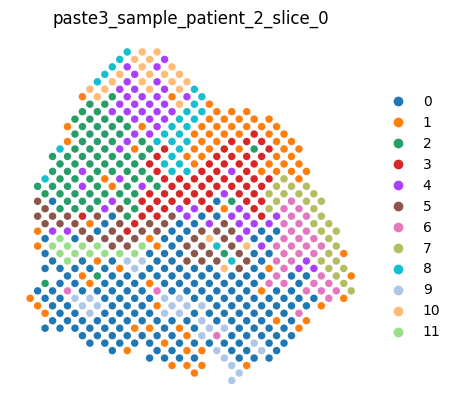

In [5]:
dataset.slices[0]

An entire dataset can be rendered by typing the dataset variable name in a cell, which renders each slice in order.

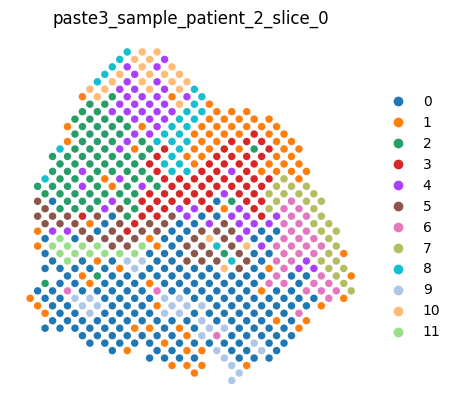

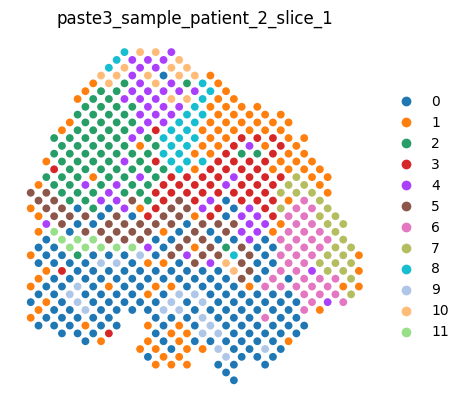

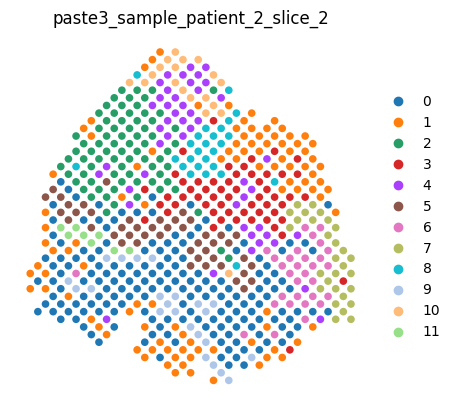

In [6]:
dataset

## Center Aligning a Dataset

A dataset object can be center aligned in 2 steps:

1. Find the "center slice" (or the "consensus slice") and similarity matrix between spots using the `<dataset>.find_center_slice` method. **This is a time consuming step and benefits from being run on a GPU-enabled environment.**
2. Use these values to center align the dataset using the `<dataset>.center_align` method.

The first returned value is the aligned dataset, along with other useful information (rotations/translations). Here we ignore all returned values except the first one.

Center alignment is explained in detail in the [Paste](https://www.nature.com/articles/s41592-022-01459-6) paper.

In [7]:
center_slice, pis = dataset.find_center_slice()
aligned_dataset, *_ = dataset.center_align(center_slice=center_slice, pis=pis)

(INFO) (dataset.py) (10-Jan-25 17:13:59) Finding center slice


(INFO) (paste.py) (10-Jan-25 17:13:59) GPU is not available, resorting to torch CPU.


(INFO) (paste.py) (10-Jan-25 17:13:59) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (10-Jan-25 17:14:27) Iteration: 0


(INFO) (paste.py) (10-Jan-25 17:14:27) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (10-Jan-25 17:14:27) Slice 0


(INFO) (paste.py) (10-Jan-25 17:14:27) Slice 1


(INFO) (paste.py) (10-Jan-25 17:14:28) Slice 2


(INFO) (paste.py) (10-Jan-25 17:14:29) center_ot done


(INFO) (paste.py) (10-Jan-25 17:14:29) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (10-Jan-25 17:14:38) Objective -142.8180211018315 | Difference: 142.8180211018315


(INFO) (paste.py) (10-Jan-25 17:14:38) Iteration: 1


(INFO) (paste.py) (10-Jan-25 17:14:38) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (10-Jan-25 17:14:38) Slice 0


(INFO) (paste.py) (10-Jan-25 17:14:39) Slice 1


(INFO) (paste.py) (10-Jan-25 17:14:39) Slice 2


(INFO) (paste.py) (10-Jan-25 17:14:40) center_ot done


(INFO) (paste.py) (10-Jan-25 17:14:40) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (10-Jan-25 17:14:51) Objective 0.895093733781344 | Difference: 143.71311483561286


(INFO) (paste.py) (10-Jan-25 17:14:51) Iteration: 2


(INFO) (paste.py) (10-Jan-25 17:14:51) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (10-Jan-25 17:14:51) Slice 0


(INFO) (paste.py) (10-Jan-25 17:14:51) Slice 1


(INFO) (paste.py) (10-Jan-25 17:14:52) Slice 2


(INFO) (paste.py) (10-Jan-25 17:14:52) center_ot done


(INFO) (paste.py) (10-Jan-25 17:14:52) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (10-Jan-25 17:15:03) Objective 0.9025986308668262 | Difference: 0.007504897085482187


(INFO) (paste.py) (10-Jan-25 17:15:03) Iteration: 3


(INFO) (paste.py) (10-Jan-25 17:15:03) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (10-Jan-25 17:15:03) Slice 0


(INFO) (paste.py) (10-Jan-25 17:15:03) Slice 1


(INFO) (paste.py) (10-Jan-25 17:15:04) Slice 2


(INFO) (paste.py) (10-Jan-25 17:15:04) center_ot done


(INFO) (paste.py) (10-Jan-25 17:15:04) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (10-Jan-25 17:15:14) Objective 0.8967856411071421 | Difference: 0.0058129897596841396


(INFO) (paste.py) (10-Jan-25 17:15:14) Iteration: 4


(INFO) (paste.py) (10-Jan-25 17:15:14) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (10-Jan-25 17:15:14) Slice 0


(INFO) (paste.py) (10-Jan-25 17:15:15) Slice 1


(INFO) (paste.py) (10-Jan-25 17:15:15) Slice 2


(INFO) (paste.py) (10-Jan-25 17:15:16) center_ot done


(INFO) (paste.py) (10-Jan-25 17:15:16) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (10-Jan-25 17:15:26) Objective 0.9024441130949585 | Difference: 0.005658471987816438


(INFO) (paste.py) (10-Jan-25 17:15:26) Iteration: 5


(INFO) (paste.py) (10-Jan-25 17:15:26) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (10-Jan-25 17:15:26) Slice 0


(INFO) (paste.py) (10-Jan-25 17:15:27) Slice 1


(INFO) (paste.py) (10-Jan-25 17:15:27) Slice 2


(INFO) (paste.py) (10-Jan-25 17:15:27) center_ot done


(INFO) (paste.py) (10-Jan-25 17:15:27) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (10-Jan-25 17:15:37) Objective 0.9052546190584809 | Difference: 0.0028105059635223917


(INFO) (paste.py) (10-Jan-25 17:15:37) Iteration: 6


(INFO) (paste.py) (10-Jan-25 17:15:37) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (10-Jan-25 17:15:37) Slice 0


(INFO) (paste.py) (10-Jan-25 17:15:38) Slice 1


(INFO) (paste.py) (10-Jan-25 17:15:38) Slice 2


(INFO) (paste.py) (10-Jan-25 17:15:38) center_ot done


(INFO) (paste.py) (10-Jan-25 17:15:38) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (10-Jan-25 17:15:50) Objective 0.9018425708988059 | Difference: 0.0034120481596749963


(INFO) (paste.py) (10-Jan-25 17:15:50) Iteration: 7


(INFO) (paste.py) (10-Jan-25 17:15:50) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (10-Jan-25 17:15:50) Slice 0


(INFO) (paste.py) (10-Jan-25 17:15:50) Slice 1


(INFO) (paste.py) (10-Jan-25 17:15:50) Slice 2


(INFO) (paste.py) (10-Jan-25 17:15:51) center_ot done


(INFO) (paste.py) (10-Jan-25 17:15:51) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (10-Jan-25 17:16:03) Objective 0.9057043130804422 | Difference: 0.003861742181636263


(INFO) (paste.py) (10-Jan-25 17:16:03) Iteration: 8


(INFO) (paste.py) (10-Jan-25 17:16:03) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (10-Jan-25 17:16:03) Slice 0


(INFO) (paste.py) (10-Jan-25 17:16:04) Slice 1


(INFO) (paste.py) (10-Jan-25 17:16:04) Slice 2


(INFO) (paste.py) (10-Jan-25 17:16:04) center_ot done


(INFO) (paste.py) (10-Jan-25 17:16:04) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (10-Jan-25 17:16:18) Objective 0.9015663963138815 | Difference: 0.004137916766560723


(INFO) (paste.py) (10-Jan-25 17:16:18) Iteration: 9


(INFO) (paste.py) (10-Jan-25 17:16:19) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (10-Jan-25 17:16:19) Slice 0


(INFO) (paste.py) (10-Jan-25 17:16:19) Slice 1


(INFO) (paste.py) (10-Jan-25 17:16:19) Slice 2


(INFO) (paste.py) (10-Jan-25 17:16:20) center_ot done


(INFO) (paste.py) (10-Jan-25 17:16:20) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (10-Jan-25 17:16:31) Objective 0.9040103819191492 | Difference: 0.0024439856052677067


(INFO) (paste.py) (10-Jan-25 17:16:31) Center slice computed.


(INFO) (dataset.py) (10-Jan-25 17:16:31) Center aligning


(INFO) (dataset.py) (10-Jan-25 17:16:31) Stacking slices around center slice


We can render the center slice and the aligned dataset as usual.

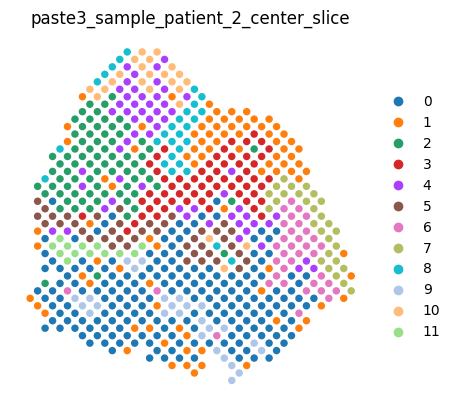

In [8]:
center_slice

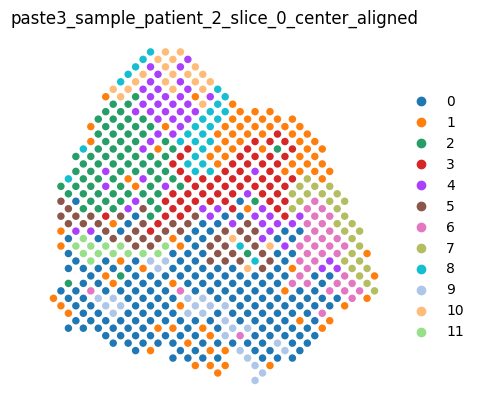

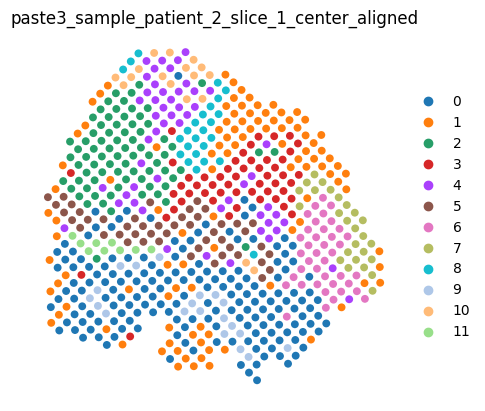

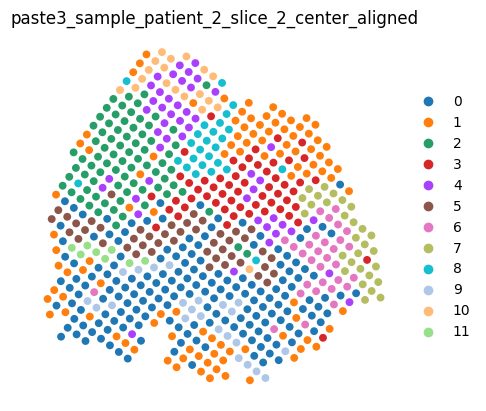

In [9]:
aligned_dataset

## Pairwise aligning a Dataset

A dataset can be pairwise aligned using the `<dataset>.pairwise_align` method. An `overlap_fraction` value (between 0 and 1) can be specified.

A value of `None` results in pairwise alignment that is identical to the approach mentioned in the [Paste](https://www.nature.com/articles/s41592-022-01459-6) paper. Any other value between 0 and 1 results in pairwise alignment explained in the [Paste2](https://pubmed.ncbi.nlm.nih.gov/37553263/) paper.

In [10]:
pairwise_aligned_dataset = dataset.pairwise_align(overlap_fraction=0.7)

(INFO) (dataset.py) (10-Jan-25 17:16:33) Finding Pi for slices 0 and 1


(INFO) (paste.py) (10-Jan-25 17:16:33) GPU is not available, resorting to torch CPU.


(INFO) (dataset.py) (10-Jan-25 17:16:34) Finding Pi for slices 1 and 2


(INFO) (paste.py) (10-Jan-25 17:16:34) GPU is not available, resorting to torch CPU.


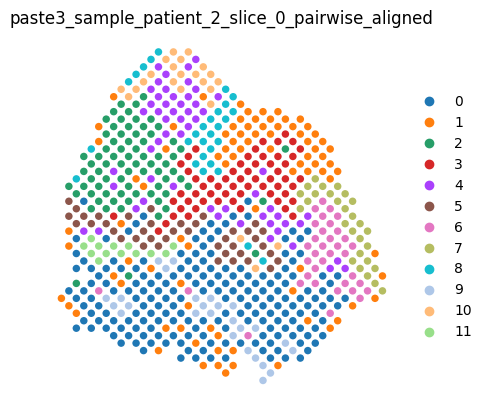

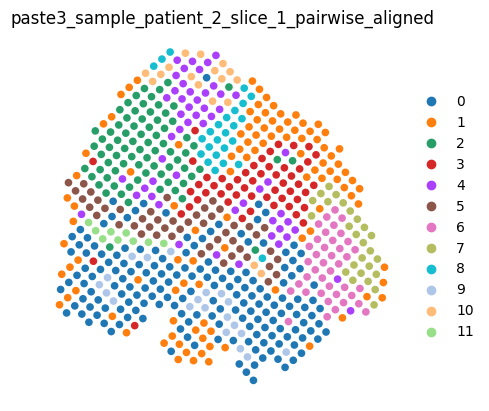

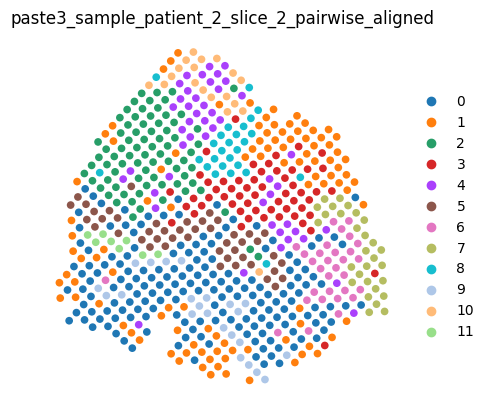

In [11]:
pairwise_aligned_dataset[0]